# Crime Rates over Time by Jurisdiction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../code")

In [4]:
import loaders.cityprotect as cp

In [5]:
from analysis.grouping import time_bin_cityprotect_incident_types

In [6]:
prop_list = ["Breaking & Entering", "Property Crime", "Theft of Vehicle", "Theft from Vehicle", "Theft"]
violent_list = ["Assault", "Robbery", "Sexual Offense", "Homicide", "Rape"]

In [7]:
local_depts = ["Los Altos Police Department",
         "San Pablo Police Department",
         "Union City Police"]

In [8]:
sheriff_cities = ["Los Altos Hills",
                  "Saratoga",
                  "Cupertino"] 

In [9]:
depts = local_depts + sheriff_cities

In [10]:
dfs = {dept: cp.cityprotect("../data/raw_data/{}".format(dept.replace(" ", "_"))) for dept in local_depts}

Loading from 24 files.
Loading from 24 files.
Data file ../data/raw_data/San_Pablo_Police_Department/Jul_Sep_2022_San_Pablo_Police_Department_report.csv is empty.
Data file ../data/raw_data/San_Pablo_Police_Department/Oct_Dec_2022_San_Pablo_Police_Department_report.csv is empty.
Loading from 24 files.


In [11]:
sheriff_df = pd.read_pickle("../data/clean_data/SCCSheriff_2017_2022_inferredCity.pkl")

In [13]:
sheriff_df = cp.reclassify_incidents(sheriff_df)

In [14]:
dfs.update({city:sheriff_df[sheriff_df["inferredCity"]==city] for city in sheriff_cities})

In [16]:
monthly_dfs = {dept:time_bin_cityprotect_incident_types(dfs[dept]) for dept in depts}

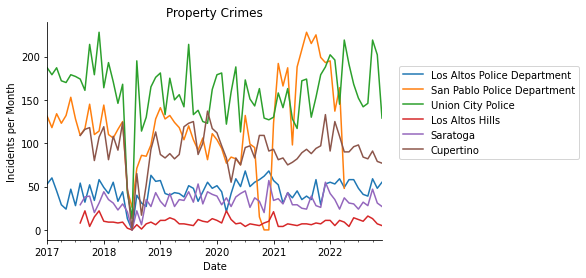

In [18]:
fig, axs = plt.subplots()
for city, monthly_df in monthly_dfs.items():
    monthly_df[monthly_df.columns.intersection(prop_list)].sum(axis=1).plot(label=city, ax=axs)
axs.set(xlabel="Date", ylabel="Incidents per Month")
axs.set(title="Property Crimes")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

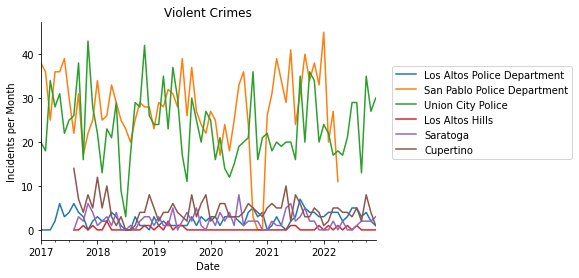

In [19]:
fig, axs = plt.subplots()
for city, monthly_df in monthly_dfs.items():
    monthly_df[monthly_df.columns.intersection(violent_list)].sum(axis=1).plot(label=city, ax=axs)
axs.set(xlabel="Date", ylabel="Incidents per Month")
axs.set(title="Violent Crimes")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()